In [2]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=fbb69f034778f70296e3202d3965effe41fae0dabaab5948e802f5e30dab4ce9
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


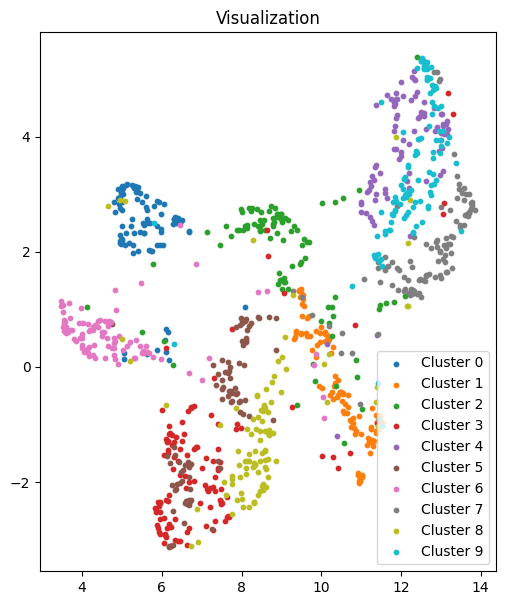

In [5]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap

mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float32') / 255.0
y = mnist.target.astype('int')

np.random.seed(42)
subset_indices = np.random.choice(len(X), 1000, replace=False)
X_array = X.to_numpy()
X_subset = X_array[subset_indices]
y_subset = y[subset_indices]

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_subset)

pca_viz = umap.UMAP(n_components=2)
X_tsne = pca_viz.fit_transform(X_subset)

plt.figure(figsize=(20, 7))
plt.subplot(131)
for i in range(len(np.unique(y_subset))):
    plt.scatter(X_tsne[y_subset == i, 0], X_tsne[y_subset == i, 1], label=f'Cluster {i}', s=10)
plt.title('Visualization')
plt.legend()
plt.show()

In [39]:
from sklearn.cluster import KMeans
import pandas as pd

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)

centroids = kmeans.cluster_centers_

pca_df = pd.DataFrame(X_pca, columns=[f'Component_{i}' for i in range(X_pca.shape[1])])
pca_df['Class'] = y

class_means = pca_df.groupby('Class').mean()

#X_pca_with_class = np.concatenate((X_pca, y[:, np.newaxis]), axis=1)

cluster_means = pd.DataFrame(kmeans.cluster_centers_, columns=[f'Component_{i}' for i in range(X_pca.shape[1])])

final_df = pd.concat([class_means, cluster_means], keys=['Class Mean', 'Cluster Mean'])
final_df.to_csv('mean_data.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
